In [6]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [1544]:
close("all")
fig, ax = subplots(figsize=(8,2))
x = arange( 128, dtype=uint8 )
y = arange(  32, dtype=uint8  )
xx, yy = meshgrid( x, y )
buff = zeros( (xx.shape[0], xx.shape[1], 3) )
frm = 0
img = ax.imshow( buff )

# Noisy Interference effect

In [1474]:
frm = 500
i = randint(1,8)
j = randint(1,8)
print(i,j)

3 7


In [1488]:
temp1 = abs((( i*yy+(frm*16)//(xx+16))%64)-32)*7
temp2 = abs((( j*xx+(frm*16)//(yy+16))%64)-32)*7
buff[:,:,0] = temp1 & ((i<<5)-1)
buff[:,:,1] = temp2 & ((j<<5)-1)
buff[:,:,2] = (temp1^temp2)&(0x88)
frm += 1
img.set_data( buff )

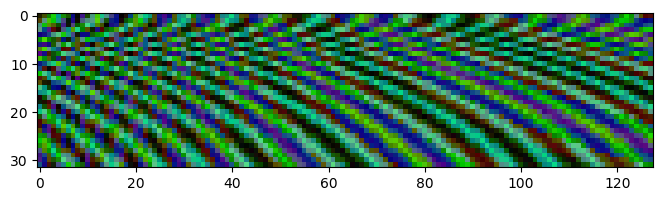

In [39]:
fig

# XOR effect

In [1489]:
# setPixel( 0, x, y, ((x+y+frm)&aniZoom)*boost, ((x-y-frm)&aniZoom)*boost, ((x^y)&aniZoom)*boost, 0 );
frm = 0
zoom = 32
boost = 4

In [1490]:
zoom = randint(1, 2**16)
boost = randint(1, 8)
print( zoom, boost)

22315 5


In [1491]:
buff[:,:,0] = ((xx+yy+frm)&zoom)*boost
buff[:,:,1] = ((xx-yy-frm)&zoom)*boost
buff[:,:,2] = ((xx^yy)&zoom)*boost
frm += 1
img.set_data( buff )

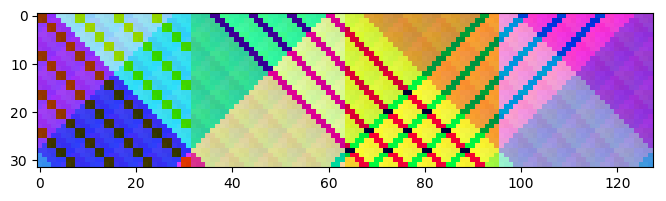

In [1457]:
fig

# alien flame

In [6916]:
arange(127-1,127+2)

array([126, 127, 128])

In [7748]:
x = 0
sum( buff[y+1,x-1:x+2,randint(0,3,1)*1] )

0

In [8161]:
5/8

0.625

In [8158]:
3/5

0.6

In [7910]:
buff[:] = 0

In [8157]:
# if sum(buff)<50000:
buff[31,randint(0,128,1),0] += 1
buff[31,randint(0,128,1),0] //= 2
for y in range(30, -1, -1):
    for x in range(128):
        temp = int( sum( buff[y+1,x-1:x+2,randint(0,3,1)] ) ) // 2
        buff[y,x,randint(0,3,1)] = temp & 0xFF
        #buff[y,x,1] = sum( buff[y+1,x-1:x+3,0] ) // 3
        #buff[y,x,2] = sum( buff[y+1,x-1:x+2,0] ) // 2
frm += 1
img.set_data( buff )

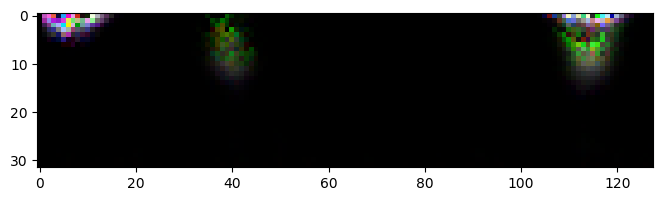

In [6798]:
fig

# ?

In [1594]:
frameNumber = 1

In [1762]:
buff[:,:,0] = abs(xx+yy*25 + frameNumber)
#buff[:,:,1] = 0#255-2*xx
#buff[:,:,2] = 0#yy*8
buff = array(buff, dtype=uint8)
img.set_data(buff)
frameNumber += 1